In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [203]:
# --------------------------------------------------------------------------------------------------------------------
# --------1. Plot the dataset using different colors for the three classes. A. speed vs price B.speed vs hp-----------
# --------------------------------------------------------------------------------------------------------------------

In [204]:
# Reading a CSV file and converting into dataframe.

def read_csv_to_dataframe(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

In [205]:
# Code for plotting the data.

def plot_data(df, x_column, y_column, color_column):
    dataframe = df.copy(deep=False)
    dataframe['Model'] = dataframe['Model'].replace('Series N', 'red').replace('Series M', 'blue').replace('Series L', 'green')
    plt.scatter(dataframe[x_column], dataframe[y_column], c=dataframe[color_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.show()

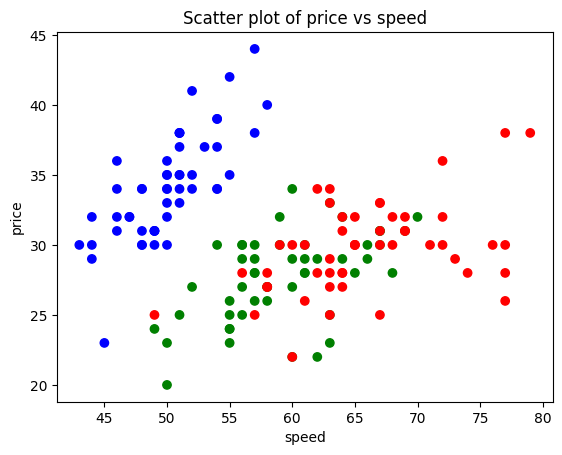

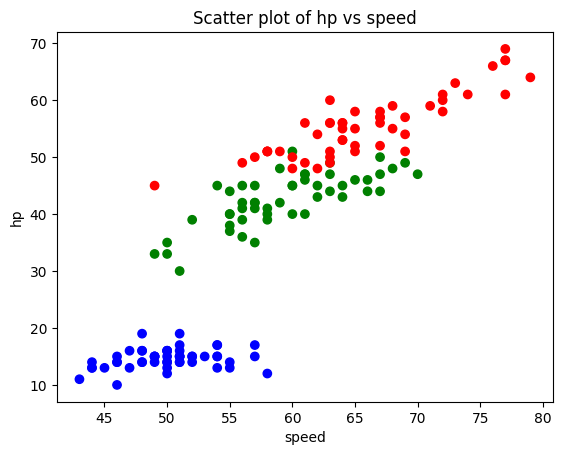

In [206]:
file_path = 'dataset_1.csv' 
df = read_csv_to_dataframe(file_path)
plot_data(df, 'speed', 'price', 'Model')
plot_data(df, 'speed', 'hp', 'Model')

In [207]:
# ------------------------------------------------------------------------------------------------------------------------
# ----2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features.------
# ------------------------------------------------------------------------------------------------------------------------

In [208]:
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------3. Implement a Regularised logistic regressor. ------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [209]:
# ----------------------------------------------------- A ---------------------------------------------------------------

In [210]:
# Calculates sigmoid for a array of values.
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [211]:
# Getting weight vector and intercept using logistic regression.
def regularised_logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate, lamda):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_)) + lamda * weight_vector
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [212]:
def spilt_data_into_training_and_testing(df, random_state):
    df_shuffled = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    total_rows = len(df_shuffled)
    train_rows = int(0.8 * total_rows)
    train_df = df_shuffled[:train_rows]
    test_df = df_shuffled[train_rows:]
    return train_df, test_df

In [213]:
# Plotting the hyperplanes obtained from logistic regression.
def plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='Line')
    plt.plot(line_x, line_y_n, color='yellow', label='Line')
    plt.plot(line_x, line_y_l, color='black', label='Line')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [214]:
# Softmax function
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [215]:
# Define your decision boundary condition function
def condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m) / np.linalg.norm(weight_vector_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) / np.linalg.norm(weight_vector_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) / np.linalg.norm(weight_vector_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [ ]:
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
training_accuracy = []
testing_accuracy = []
lamda = 0.1
for i in range(10):
    seed = seeds[i]
    train_df, test_df = spilt_data_into_training_and_testing(df, seed)
    
    X_train = np.array(train_df[['speed', 'price']].values.tolist())
    y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    X_test = np.array(test_df[['speed', 'price']].values.tolist())
    y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    weight_vector_m, intercept_m = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, 1000, 0.01, lamda)
    weight_vector_n, intercept_n = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, 100000, 0.01, lamda)
    weight_vector_l, intercept_l = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, 100000, 0.01, lamda)

    training_error = len(X_train)
    for i in range(len(X_train)):
        if condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error -= 1
            
    testing_error = len(X_test)
    for i in range(len(X_test)):
        if condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error -= 1

    training_accuracy.append(training_error/len(X_train))
    testing_accuracy.append(testing_error/len(X_test))

print(training_accuracy)
print(testing_accuracy)
print("Training Accuracy mean", np.mean(np.array(training_accuracy)))
print("Training Accuracy std", np.std(np.array(training_accuracy)))
print("Testing Accuracy mean", np.mean(np.array(testing_accuracy)))
print("Testing Accuracy std", np.std(np.array(testing_accuracy)))

In [ ]:
beta_values = [0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.5, 1]
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
training_accuracy = []
testing_accuracy = []
lamda = 0.1

for beta in beta_values:
    training_accuracy_i = []
    testing_accuracy_i = []
    
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, 1000, beta, lamda)
        weight_vector_n, intercept_n = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, 50000, beta, lamda)
        weight_vector_l, intercept_l = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, 50000, beta, lamda)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
                
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy_i.append(training_error/len(X_train))
        testing_accuracy_i.append(testing_error/len(X_test))
        
    training_accuracy.append(np.mean(np.array(training_accuracy_i)))
    testing_accuracy.append(np.mean(np.array(testing_accuracy_i)))

print("Training accuracy", training_accuracy)
print("Testing accuarcy", testing_accuracy)

In [ ]:
plt.scatter(beta_values, training_accuracy, color= 'red')
plt.scatter(beta_values,testing_accuracy, color = 'green')

plt.xlabel('beta')
plt.ylabel('accuracy')
plt.title('Plot of beta vs accuracy')

# Show the plot
plt.show()

In [134]:
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------4. Implement a Vanilla logistic regressor. ----------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [135]:
# Calculates sigmoid for a array of values.
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [136]:
# Getting weight vector and intercept using logistic regression.
def logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_))
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [137]:
# Plotting the hyperplanes obtained from logistic regression.
def plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='Line')
    plt.plot(line_x, line_y_n, color='yellow', label='Line')
    plt.plot(line_x, line_y_l, color='black', label='Line')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [150]:
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

# weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, 1000, 0.01)
# weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, 200000, 0.005)
# weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, 200000, 0.005)
weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, 1000, 0.01)
weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, 1000000, 0.001)
weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, 1000000, 0.001)

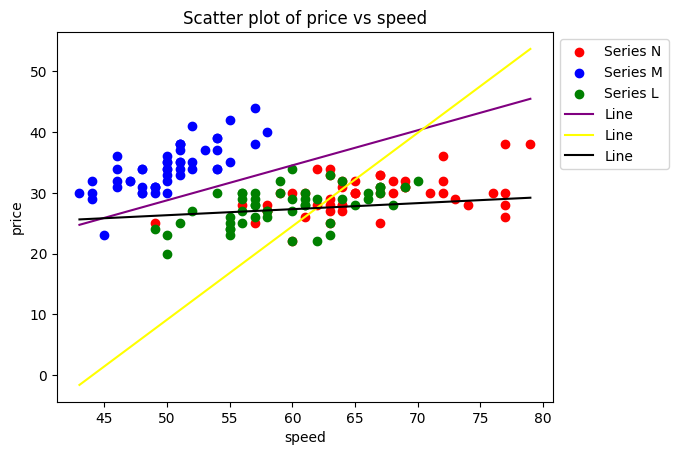

In [151]:
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [ ]:
# Softmax function
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [152]:
# Define your decision boundary condition function
def condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m) / np.linalg.norm(weight_vector_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) / np.linalg.norm(weight_vector_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) / np.linalg.norm(weight_vector_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [154]:
def plot_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 0, 60
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Coloring the X-Y Plane based on Condition')
    plt.show()

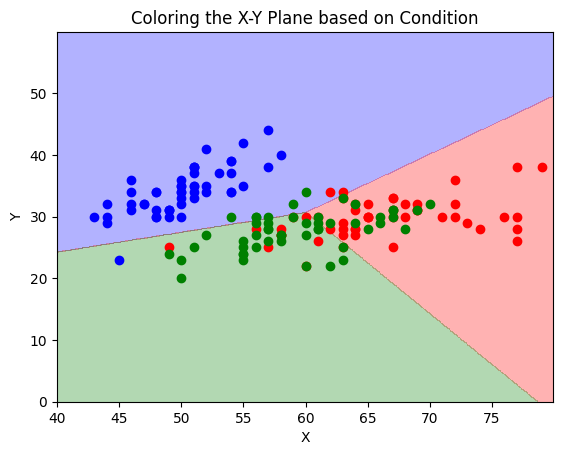

In [155]:
plot_logistic_regression_decision_boundary()